# Student name: Muhammad Khubaib Akram

# Student ID: 23098929

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import math
import random
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import pandas as pd
from sklearn.neural_network import MLPClassifier

# Task 1
### Purpose:
To check your understanding of key terms used throughout this module.

In a perceptron model, the "input space" is the dimensions representing features of objects, which are circumference and weight in our case. Input space contains all the possible pairs of features. This data in the input space will be then used by perceptron to classify objects into two categories which is represented in the "output space" as unique/distinct labels to identify the categories. Perceptron tries to use different values from the input space in order to classify the objects. The "unknown target function" is the ideal function or rule that perfectly classifies all possible inputs but it is unknown. The perceptron goal is to approximate it using a "data set" of example inputs with known labels. The "hypothesis set" is the set of all hypothesis which are potential linear boundaries the perceptron considers to separate the classes. The "final hypothesis" is the best approximation of the target function based on training which is selected to minimize an "error measure" that quantifies misclassifications. "In-sample error" is the error rate on the training data telling us how well the model fits this data. "Out-of-sample error" estimates the model's performance on new, unseen data, indicating its generalization ability.

## Answer

Provide your answer in this cell..

# Task 2
Learning curves allow us to look at the impact that the size of the training data set N has on the ability to keep the difference between $E_{in}$ and $E_{out}$ small.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    #plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_errors = 1- train_scores
    test_errors = 1-test_scores

    train_errors_mean = np.mean(train_errors, axis=1)
    train_errors_std = np.std(train_errors, axis=1)
    test_errors_mean = np.mean(test_errors, axis=1)
    test_errors_std = np.std(test_errors, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_errors_mean - train_errors_std,
                     train_errors_mean + train_errors_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_errors_mean - test_errors_std,
                     test_errors_mean + test_errors_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_errors_mean, 'o-', color="r",
             label="Training error")
    plt.plot(train_sizes, test_errors_mean, 'o-', color="g",
             label="Test error")


    plt.legend(loc="best")
    return plt

In [ ]:
data = np.loadtxt("Et1_Task2.csv", delimiter=",")
X = data[:,0:2]
y=data[:,2]

## Logistic regression learning curve

In [ ]:
cv = ShuffleSplit(n_splits=25, test_size=0.2)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

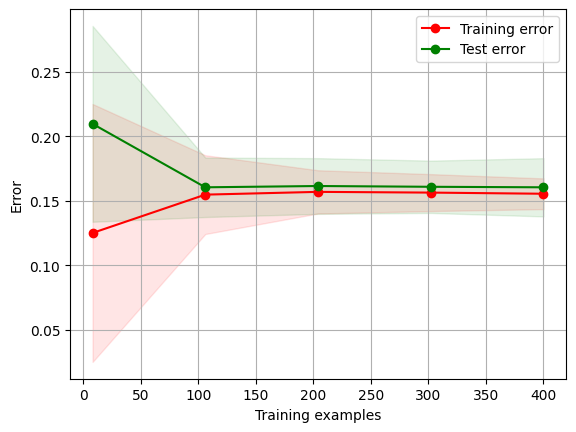

In [ ]:
estimator = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4, train_sizes = np.linspace(0.01, .5, 5))

## Neural net learning curves

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

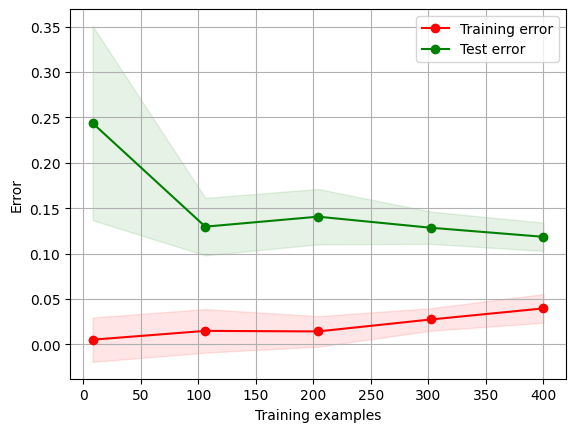

In [ ]:
estimator = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(200, 4), random_state=1)
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4, train_sizes = np.linspace(0.01, .5, 5))

## Describe and Explain
Describe the results of the two learning curves and explain the differences in terms of what you currently understand about the relationship between $E_{in}$ and $E_{out}$ and the number of training samples, N. Provide clear explanations:

- Why the training error is (generally) lower than the test error
- Why the training error increases as the number of training samples is increased
- Which of the two models is the more complex model

### Answer


Provide your answer in this cell..



1.   The training error is generally lower than the test error as the model is trained to fits the training data.so it performs better on the this data. But as the model hasnt seen the test data and might have unseen scenarios which might not occur during the training which mostly causes the test error to be higher than the training data.
2. The more training samples mean that there are more unscene scenarios which model might see and as it is learning on the data training error will increase. The complexity of the data increase with more samples in the training data which might result that the model might not be able to fit resulting in more errors.
3. The first model is using logistic regression which is a linear model. Linear models are generally considered less complex since they attempt to fit a linear decision boundary to the data. The MLPClassifier has a significantly more complex model structure with 200 neurons in one layer and 4 in another, giving it a high degree of flexibility to learn from the data.
4. Training error can be higher than the test set either if the data set is small and during the training model overfits on the training data resulting in less error during the testing. Regularization is important  in order for the model not to overfit on the data.



Task 2: Analysis of Learning Curves


# Task 3

## Provided functions

Below functions implement linear regression in a closed form (one-step solution using the pseudo-inverse).

In [ ]:
def linreg_weights(X,y):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # Calculation of weights using pseudo-inverse.
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [ ]:
def linreg_predict(w,X):
    ''' Returns a prediction y for data point X for a linear regression described by weights w '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)

    # Calculation of outputs given weights and data (X).
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

# Task 3a

### Answer

In [ ]:
def calc_error(w,X,y):
    # implement your error function for linear regression here

    X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    predicted = np.dot(X, w)
    # Calculate the mean squared error (target - predicted)^2
    mse = np.mean((y - predicted) ** 2)

    return mse

\[ y = w_0 + w_1 x \]



In [ ]:
# Load data
data = pd.read_csv('Et1_Task3a.csv', header=None)
print(data.describe())
print(data.head())

               0          1
count  20.000000  20.000000
mean    0.500000   0.630949
std     0.311373   0.172553
min     0.000000   0.384816
25%     0.250000   0.444125
50%     0.500000   0.637046
75%     0.750000   0.786284
max     1.000000   0.876411
          0         1
0  0.210526  0.426012
1  0.473684  0.650721
2  0.789474  0.784824
3  0.052632  0.442512
4  0.315789  0.444663


In [ ]:

X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Labels/targets
#print("X Shape = {X.shape})



In [ ]:
print(f"X Shape {X.shape}")
print()
print(X)
print()
print(f"X Shape {X[:, 0]}")


X Shape (20, 1)

[[0.21052632]
 [0.47368421]
 [0.78947368]
 [0.05263158]
 [0.31578947]
 [0.94736842]
 [0.63157895]
 [0.        ]
 [0.42105263]
 [0.57894737]
 [0.68421053]
 [0.36842105]
 [0.84210526]
 [0.10526316]
 [1.        ]
 [0.26315789]
 [0.52631579]
 [0.73684211]
 [0.89473684]
 [0.15789474]]

X Shape [0.21052632 0.47368421 0.78947368 0.05263158 0.31578947 0.94736842
 0.63157895 0.         0.42105263 0.57894737 0.68421053 0.36842105
 0.84210526 0.10526316 1.         0.26315789 0.52631579 0.73684211
 0.89473684 0.15789474]


In [ ]:
print(f"y Shape {y.shape}")
print()
print(y)

y Shape (20,)

[0.42601237 0.65072099 0.78482436 0.44251218 0.44466274 0.79066361
 0.59209029 0.39156142 0.62337167 0.70118235 0.66063027 0.65121604
 0.87641061 0.40380726 0.87522572 0.62246649 0.57909817 0.86577467
 0.851927   0.38481615]


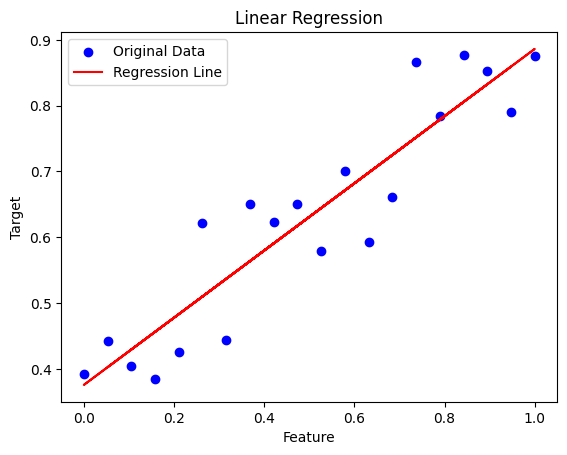

In [ ]:

w = linreg_weights(X, y)
#print(type(w))
#print(w)

plt.scatter(X[:, 0], y, color='blue', label='Original Data')
plt.plot(X[:, 0], linreg_predict(w, X), color='red', label='Regression Line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [ ]:

# Calculate and print the error
error = calc_error(w, X, y)
print("Error:", error)


Error: 0.004281801813255595


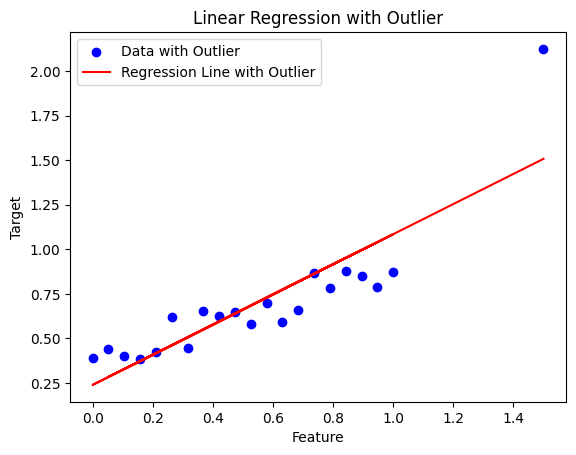

New Error with the Outlier in the data set: 0.03290354749327814


In [ ]:

outlier = np.array([[1.5]])  # outlier for your dataset

# Add an outlier to data set feature X
X_o = np.vstack([X, outlier])
# Add an outlier to target
y_o = np.append(y, [2.1234])

# Calculate the new weights with the outlier
w_or = linreg_weights(X_o, y_o)

# Plot the data with the outlier and the new regression line
plt.scatter(X_o[:, 0], y_o, color='blue', label='Data with an Outlier')

plt.plot(X_o[:, 0], linreg_predict(w_or, X_o), color='red', label='Regression Line with an Outlier')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression with  an Outlier')
plt.legend()
plt.show()

# Calculate and print the new error with the outlier
new_error = calc_error(w_or, X_o, y_o)
print("New Error with the Outlier in the data set:", new_error)


In [ ]:
predicted = linreg_predict(w_or, X_o)
sq_errors =  (y_o - predicted)**2
maxEr_index = np.argmax(sq_errors)
maxEr_datapoint = X_o[maxEr_index], y_o[maxEr_index]
print("Max Error data points", maxEr_datapoint)

Max Error data points (array([1.5]), 2.1234)


##  Describe and Explain
Discuss your results and answer the following questions:
1. Which data point adds the biggest error term to the optimised error function?
2. How does the error contributed by this point relate to its distance from the regression line/function?
3. How do outliers effect linear regression and why?
4. Under what circumstances will linear regression with a squared error measure be a good model?

Discussing the results from the implementation of linear regression, including the addition of an outlier, leads us to several insights:

1. **Which data point adds the biggest error term to the optimized error function?**
   - The data point that adds the biggest error term to the optimized error function is (1.5, 2.1234) which is an outlier.Before adding the outlier in the dataset, the error was 0.004281801813255595 but after adding the outlier it increased to 0.03290354749327814. It shows that how much outliers affect the overall result. As in MSE, square is taken which modifies the effects of an outlier.

2. **How does the error contributed by this point relate to its distance from the regression line/function?**
    
    - The farthest the outlier is the more influence it will have, if the outliers are closer to the regression line the less influnce it will have on the regression line.  

3. **How do outliers affect linear regression and why?**
   - Outliers have huge impact on linear regression models. As the linear regression aims to minimize the mean squared error between the predicted and target values. The mean square error is calculated by squaring the differences btw predicted and target/actual values. When mean square error is calculated outlier is magnified. It could lead the linear regression line being pulled or skewed towards the outlier.  

   
4. **Under what circumstances will linear regression with a squared error measure be a good model?**

  - When there arent any outliers the MSE is a good model. As outliers effect is magnified in MSE, which affects very badly.
  - When the relationship between the varaiables is linear.

You may add as many cells below as you require.

Provide your answer in this cell..

# Task 3b

For regression the Mean Squared Error measure is a useful error measure. In this task we will explore how useful mean squared error is for classification. To this end:

- Use the provided code to classify the provided data using the linear classification algorithm
- Note that linear classification is implemented by putting the output of the linear regression model through the sign function

### Answer

In [ ]:
def calc_class_error(w,X,y):
    # implement your error function for linear classification here


In [ ]:
def linclass_predict(w,X):
    # implement your linear classification algorithm here


You may add as many cells below as you require.

##  Describe and Explain
Describe the impact of the outlier on both models. Explain why logistic regression is less sensitive to the outlier.

Provide your answer in this cell..

 # Reflection
 Once you have completed all tasks in this notebook and have studied all other materials for this E-tivity (resources, lectures and live sessions), answer the following questions.
<ol>
<li>Summarise your understanding of how the Hoeffding bound, the concept of 'shattering', break points and the growth function inform the VC bound for a binary classifier. Also discuss how this relates to the general rule of thumb in machine learning that one needs a number of data points at least equal to 10 times the VC bound.</li>
<li>Summarise your understanding of the approximation-generalisation trade-off in terms of complexity, bias and variance of a model, and the resulting under/overfitting given the available data. </li>
    </ol>

1.




*   **Hoeffding bound** provides an upper bound on the probability that the in-sample error $E_{in}$ and the out-of-sample error $E_{out}$ will deviate by more than a certain  $\epsilon$

    $P[∣E_{in}(h​)−E_{out}(hi​)∣>ϵ]≤ 2e^{−2ϵ^2N}$

*   **Shattering** concept is that the ability of a hypothesis set to classify all the points perfectly give a data points N.


* The set of hypotheses which classifies the data points the same and doesn't classify even one data point differently is known as **dichotomies**.
* The maximum number of dichotomies, as a function of N, that can be realised by a model is called the **growth function** of that model. If all the $2^N$ dichotomies are realized then the model has shattered the data for those N points. The growth function increases slowly then the factor of $2^N$ for each increment in value of N.  
* There comes the value of N where the data points are no longer able to shatter the dataset; this value of N is known as the **breakpoint** of the model. If a hypothesis set has a break point for N=k and k is finite, that the growth function is always smaller than:

  $m_h(𝑁) ≤ N^{k-1} +1= N^{d_{VC}} +1$

  This breakpoint value of N is known as K. K-1 is equal to the largest N for which the hypothesis set shatters a constellation of N points, and this N can be thought of as expressing the complexity of the hypothesis set. K-1 is known as the VC dimension of the model. With all the shattering, breakpoints, growth functions, we updated Hoeffding bound with the upper bound on the growth function is known as **VC bound**.
  
  $P[∣E_{in}(h​)−E_{out}(hi​)∣>ϵ]≤ 4[(2N)^{d_{VC}}+1]e^{−1/8ϵ^2N}$

* The rule of thumb is that the minimun amount required for data is 10 times the VC dimension in order for the model to generalize well on the unseen data as well.

-------------------------------------


## 2


Bias is difference between the average hypothese and the actual output. If the bias is high, it means that model is underfit and it missed the relevant information which will cause the model not to generalize well on the unseen data.

Variance is the difference between the each individual hypthosis than the average hypothesis. If the variance is high then it will catch the noise in the data and will overfit the training data.

A model which is too simple will have high bias, it means it will not learn well from the training datadata is (underfit) meanwhile the mode which has high complexity will learn too much from the training data (overfit) it wont generalize well on the unseen/testing data meaning it will have high variance.

The approximation-generalization trade-off lies in finding the right balance between simplicity and complexity in a model to minimize overall error.



##What I have learned from my peers?

**I need to explain the answers in details instead of writing short answer or linear. Make it explainable as much as I can. **

<hr style="border:2px solid gray">

# Appendix

## Demonstration of effect of outlier on logistic regression decision boundary for comparision with linear classification

Below code demonstrates the effect of an outlier on the decision boundary chosen by logistic regression. You can use this code to compare the effect of outliers in a classification algorithm using mean square error as the error measure with that in a classification algorithm using log likelihood as the error measure. Moreover, below code provides some good hints for plotting the decision boundary in task 3b :-).

Load data:

In [ ]:
data = np.loadtxt("Et1_Task3b.csv", delimiter=",")
X = data[:,0:2]
y=data[:,2]

Fit model:

In [ ]:
estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X,y)
estimator.score(X,y)

0.83

Extract weights from model:

In [ ]:
w_lr = estimator.intercept_
w_lr=np.append(w_lr, estimator.coef_)
w_lr

array([ 0.0734753 ,  1.13198888, -1.608425  ])

Add outlier:

In [ ]:
X = np.append(X,[[-2,6]], axis=0)
y = np.append(y,[1],axis=0)

Fit model with outlier:

In [ ]:
estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X,y)
estimator.score(X,y)

0.8118811881188119

Extract new weight vector from model:

In [ ]:
w_lr_2 = estimator.intercept_
w_lr_2=np.append(w_lr_2, estimator.coef_)
w_lr_2

array([ 0.09420734,  0.96672772, -1.03886315])

Plot original and new decision boundary using weight vectors. Decision boundary is defined by equation: $w_0+x_0\cdot w_1+x_1 \cdot w_2=0 \rightarrow x_2 = -\frac{w_0}{w_2}-x_1\frac{w_1}{w_2}$

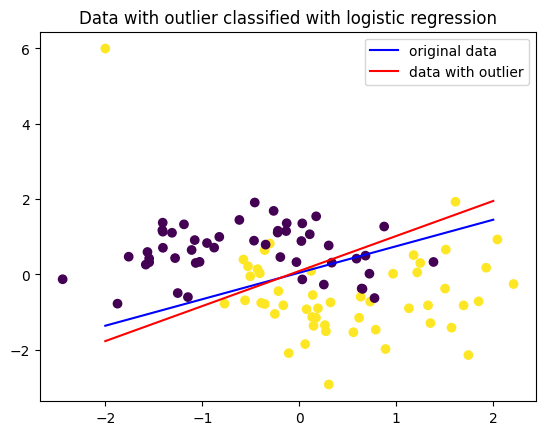

0.6237623762376238

In [ ]:
y_p = estimator.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot([-2,2],[-w_lr[0]/w_lr[2]+w_lr[1]/w_lr[2]*2,-w_lr[0]/w_lr[2]-w_lr[1]/w_lr[2]*2],'b',label="original data")
plt.plot([-2,2],[-w_lr_2[0]/w_lr_2[2]+w_lr_2[1]/w_lr_2[2]*2,-w_lr_2[0]/w_lr_2[2]-w_lr_2[1]/w_lr_2[2]*2],'r',label='data with outlier')

plt.title("Data with outlier classified with logistic regression")
plt.legend(loc="upper right")
plt.show()
1-sum(abs(y_p-y))/len(y)